In [1]:
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


In [46]:
#heviside fonction
#https://github.com/exo7math/deepmath-exo7

def heaviside(x):
	""" Définis la fonction de Heaviside qui n'est pas défini
	par défaut dans keras. A utiliser comme fonction 
	d'activiation lors de la définition d'une couche par exemple
	    modele.add(Dense(4,activation=heaviside))
	Attention il n'y a pas de guillemet ici.
	Astuce de la formule : H(x) = 1/2 (1+|x|) """

	# return (1+x/K.abs(x))/2
	# return (1+K.sign(x))/2

	z = K.zeros_like(x)	
	return 1-K.maximum(z,K.sign(-x))

In [41]:
print(heaviside(74))

from heaviside : 74 <class 'int'>
tf.Tensor(1, shape=(), dtype=int32)


In [58]:
# fonction qui cree un modele pour apromixer la fonction f
# dans l'intervalle [a, b] avec n escalier
def createModel(f, a, b, n): 

    modele = Sequential()
    # pour n escaliers on a besoin de 2n neurones (perceptron)
    modele.add(Dense(2*n, input_dim=1, activation=heaviside))
    modele.add(Dense(1,)) # On specifie pas la fonction d'activation donc par defaut on aura la fonction identite

    
    stairPoints = np.linspace(a, b, n+1)

    x_val = np.array([[-i, i] for i in stairPoints[1:n]]) 
    x_val.resize(2*len(x_val))
    x_val = list(x_val)
    x_val.insert(0 ,a)
    x_val.append( -b)
    biais_c0 = np.array([(-1)**i for i in range(1, 2*n+1)])
    coef_c0 = np.array([[1/i for i in x_val]])


    poids_c0 = [coef_c0, biais_c0]
    

    modele.layers[0].set_weights(poids_c0)

    #poids de la couche 1 de neurone
    coef_c1 = [[f(a)] for i in stairPoints[0:n] for a in (i, i)]
    biais_c1 = np.array([-sum([i[0] for i in coef_c1])/2])
    coef_c1, biais_c1 = np.array(coef_c1), np.array(biais_c1)
    poids_c1 = [coef_c1, biais_c1]
    #print(coef_c1, biais_c1)
    #print(len(coef_c1), len(biais_c1))
    modele.layers[1].set_weights(poids_c1)
    return modele


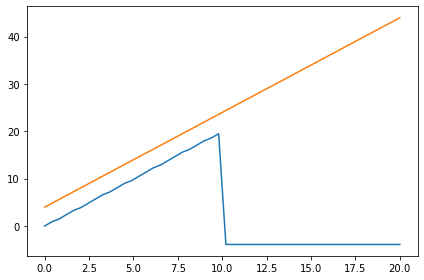

In [61]:
#f = lambda x: np.sin(x**2) + np.cos(x**2)
f = lambda x: 2*x + 4

myModel = createModel(f,0, 20, 100)

X = np.linspace(0, 20, 50)
Y1 = [y[0] for y in myModel.predict(X)]
plt.plot(X, Y1)
plt.plot(X, f(X))
plt.tight_layout()
plt.show()

In [45]:
createModel(f, 1, 3, 5)

from heaviside : Tensor("dense_36/BiasAdd:0", shape=(None, 10), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>
[[ 1.38177329]
 [ 1.38177329]
 [ 0.54575976]
 [ 0.54575976]
 [-1.0934105 ]
 [-1.0934105 ]
 [-0.8646038 ]
 [-0.8646038 ]
 [ 1.34741282]
 [ 1.34741282]] [-1.31693156]
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
